# Notebook #3: Gestión de Outliers

In [1]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import pickle

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../../../../")
from src import soporte_preprocesamiento as sp

- Importamos el dataframe generado en el notebook anterior.

In [2]:
df = pd.read_pickle('../../../../datos/cluster1/modelo1/df_encoded.pkl')
df.head()

,Profit,Ship Mode,Country,Market,Region,Category,Sub-Category,Quantity,Discount,Order Priority
0,-96.5400,18.144652,34.557165,25.847096,21.591716,62.629774,62.044307,5,0.1,19.484122
1,83.2810,19.359450,21.648691,21.648691,16.231600,15.716697,9.696875,5,0.0,18.944620
2,622.0200,22.220662,15.185094,16.720197,16.231600,38.094237,44.833869,7,0.0,33.470448
3,363.9048,18.144652,21.648691,21.648691,26.827045,62.629774,62.044307,8,0.2,18.944620
4,632.5200,19.602192,44.849984,21.959525,35.467384,62.629774,62.044307,7,0.0,18.944620


- Transformamos temporalmente las columnas que deben ser categóricas pero durante el encoding se han convertido en numéricas.

In [3]:
df[['Ship Mode', 'Country', 'Market', 'Region', 'Category', 'Sub-Category', 'Order Priority']] = df[['Ship Mode', 'Country', 'Market', 'Region', 'Category', 'Sub-Category', 'Order Priority']].astype(str)

- Como hemos detectado en el EDA, tenemos outliers en las tres features numéricas. Los de Quantity y Discount, se encuentran dentro de los valores normales (lo vemos en la escala), y en el caso de Profit, surgen de la variabilidad propia que puede tener una categoría como esta. Lo vemos en los box plots:

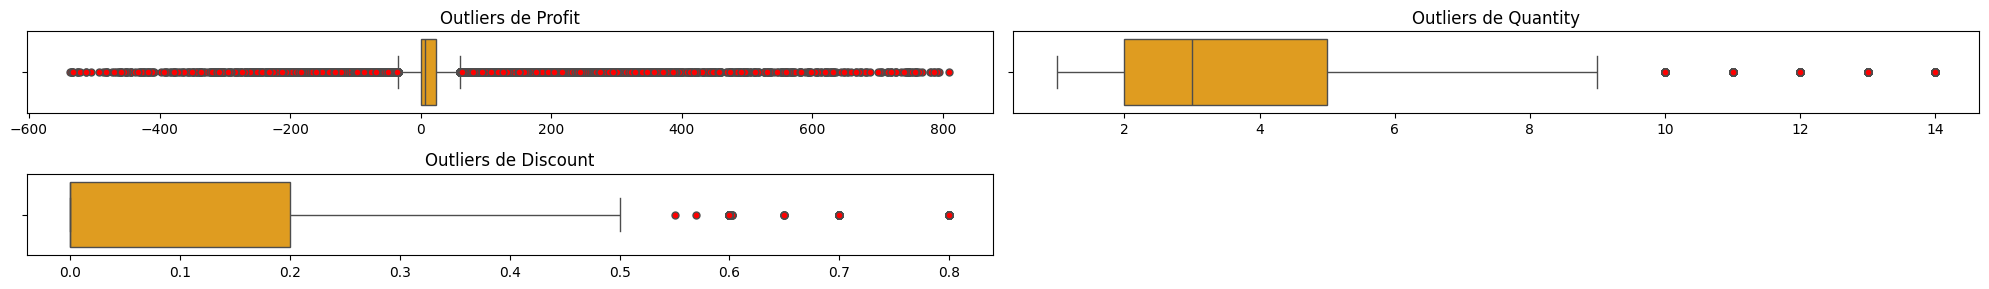

In [4]:
sp.detectar_outliers(df, tamano_grafica=(20,3))

- Para verlos numéricamente, vamos a recurrir al método IFO.

In [5]:
df = sp.outliers_isolation_forest(df)

- Filtramos aquellos para los cuáles en el 70% de las combinacines, son outliers. Sabiendo que representan un 1,4% del conjunto original, los vamos a eliminar.

In [6]:
df, df_filtrado = sp.filtrar_outliers(df, 0.7, drop_indices=True)
df.reset_index(inplace=True, drop=True)

Se han filtrado 440 filas, que representan un 1.36% del dataframe original.


,Profit,Ship Mode,Country,Market,Region,Category,Sub-Category,Quantity,Discount,Order Priority,outliers_ifo_0.01_50,outliers_ifo_0.01_100,outliers_ifo_0.01_200,outliers_ifo_0.05_50,outliers_ifo_0.05_100,outliers_ifo_0.05_200,outliers_ifo_0.1_50,outliers_ifo_0.1_100,outliers_ifo_0.1_200
2,622.0200,22.22066194331984,15.18509410548087,16.72019706943336,16.23160015044892,38.09423667439165,44.833868800000005,7,0.0,33.47044804185351,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,363.9048,18.144652104256338,21.648691224655312,21.648691224655312,26.8270448631905,62.629773641488164,62.04430696864112,8,0.2,18.94461962831689,1,-1,-1,-1,-1,-1,-1,-1,-1
4,632.5200,19.60219157116994,44.84998366013072,21.959524522582598,35.46738352745424,62.629773641488164,62.04430696864112,7,0.0,18.94461962831689,-1,-1,-1,-1,-1,-1,-1,-1,-1
9,513.3600,22.22066194331984,32.18702427184466,25.847096410178732,21.591716298157454,15.716697078215004,70.53398103225807,5,0.1,33.47044804185351,-1,1,1,-1,-1,-1,-1,-1,-1
13,747.8160,22.22066194331984,21.0356625,21.959524522582598,20.28234693877551,15.716697078215004,70.53398103225807,8,0.1,18.94461962831689,-1,-1,-1,-1,-1,-1,-1,-1,-1


Se han eliminado 440 filas (1.0%) del dataframe original.


- Y nuevamente con la ayuda de los boxplots, vemos que, nuestras features ahora se encuentran más libres de outliers.

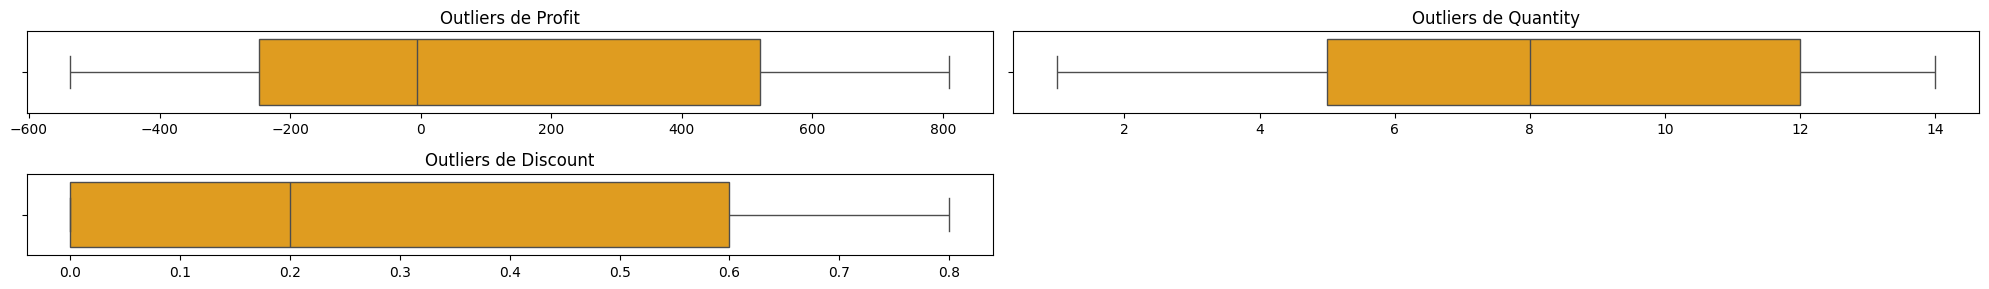

In [7]:
sp.detectar_outliers(df_filtrado, tamano_grafica=(20,3))

- Como último paso, guardamos el DF para llevarlo al siguiente paso: la estandarización.

In [8]:
with open('../../../../datos/cluster1/modelo1/df_sinoutliers.pkl', 'wb') as f:
    pickle.dump(df, f)